In [146]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels
import scipy as sc
from scipy.stats import boxcox
# для 4 задания
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

# Задание 1

По данным по Великобритании о потреблении цыплят (Y), среднедушевом доходе (X1), стоимости одного фунта цыплят (X2), стоимости одного фунта свинины (X3) и стоимости одного фунта говядины (X4)

 а) Необходимо построить, сравнить и проинтерпретировать уравнения регрессии вида:

1) $$ \hat{y} = b_0 * x_{2}^{b_2} $$ ( функция спроса)


2) $$ \hat{y} = b_0 * x_{1}^{b_1} $$ ( функция потребления)


3) $$ \hat{y} = b_0 * x_{1}^{b_1} * x_{2}^{b_2} $$ ( функция спроса-потребления)




4)  $$ \hat{y} = b_0  * x_{2}^{b_2} * x_{3}^{b_3} * x_{4}^{b_4} $$

(функция спроса с учетом цены на товары-заменители)

## а)  построить модели регрессии


In [2]:
data_1 = pd.read_excel("num1.xlsx")

In [3]:
data_1

,t,Y,X1,X2,X3,X4
0,1,31.2,492.9,37.3,54.7,77.4
1,2,33.3,528.6,38.1,63.7,80.2
2,3,35.6,560.3,39.3,69.8,80.4
3,4,36.4,624.6,37.8,65.9,83.9
4,5,36.7,666.4,38.4,64.5,85.5
5,6,38.4,717.8,40.1,70.0,93.7
6,7,40.4,768.2,38.6,73.2,106.1
7,8,40.3,843.3,39.8,67.8,104.8
8,9,41.8,911.6,39.7,79.1,114.0
9,10,40.4,931.1,52.1,95.4,124.1


Для построения модели линейной регресии прологарифмируем выражение и воспользуемся заменами.

Например, для построения модели функции спроса:


$$ \hat{y} = b_0 * x_{2}^{b_2} $$ ( функция спроса)

$$ u = \ln{\hat{y}} $$

$$ v = \ln{x_{2}}$$

Тогда получаем формулу:

$$ u = \ln{b_0} + b_2*v $$
где логарифм от константы - константа


Далее будут использоваться прологарифмированные данные, так что сделаем новый датафрейм, который будет удобно использовать

In [4]:
df_log=data_1.drop('t',axis=1)

In [5]:
df_log

,Y,X1,X2,X3,X4
0,31.2,492.9,37.3,54.7,77.4
1,33.3,528.6,38.1,63.7,80.2
2,35.6,560.3,39.3,69.8,80.4
3,36.4,624.6,37.8,65.9,83.9
4,36.7,666.4,38.4,64.5,85.5
5,38.4,717.8,40.1,70.0,93.7
6,40.4,768.2,38.6,73.2,106.1
7,40.3,843.3,39.8,67.8,104.8
8,41.8,911.6,39.7,79.1,114.0
9,40.4,931.1,52.1,95.4,124.1


In [6]:
for column in df_log.columns:
  df_log[column] = np.log(df_log[column])

In [7]:
df_log

,Y,X1,X2,X3,X4
0,3.440418,6.200306,3.618993,4.001864,4.348987
1,3.505557,6.270232,3.640214,4.154185,4.384524
2,3.572346,6.328472,3.671225,4.245634,4.387014
3,3.594569,6.437111,3.632309,4.188138,4.429626
4,3.602777,6.501890,3.648057,4.166665,4.448516
5,3.648057,6.576191,3.691376,4.248495,4.540098
6,3.698830,6.644050,3.653252,4.293195,4.664382
7,3.696351,6.737323,3.683867,4.216562,4.652054
8,3.732896,6.815201,3.681351,4.370713,4.736198
9,3.698830,6.836367,3.953165,4.558079,4.821088


In [8]:
m1=smf.ols('Y~X2', data=df_log)
fitted=m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     47.86
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.49e-06
Time:                        14:44:13   Log-Likelihood:                 22.538
No. Observations:                  19   AIC:                            -41.08
Df Residuals:                      17   BIC:                            -39.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5777      0.311      5.081      0.0

c:\users\a-bel\pycharmprojects\4\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Итак, для модели по функции спроса коэффициент детерминации равен 0,738 - модедь объясняет 73% дисперсии данных

Для построения модели линейной регресии прологарифмируем выражение и воспользуемся заменами.

Например, для построения модели функции  потребления:


$$ \hat{y} = b_0 * x_{1}^{b_1} $$ ( функция спроса)

$$ u = \ln{\hat{y}} $$

$$ v = \ln{x_{1}}$$

Тогда получаем формулу:

$$ u = \ln{b_0} + b_1*v $$
где логарифм от константы - константа

In [9]:
m2=smf.ols('Y~X1', data=df_log)
fitted=m2.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           9.84e-12
Time:                        14:44:13   Log-Likelihood:                 36.323
No. Observations:                  19   AIC:                            -68.65
Df Residuals:                      17   BIC:                            -66.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7460      0.123     14.204      0.0

c:\users\a-bel\pycharmprojects\4\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


$$R^2 = 0.939 $$ - модель хорошо приближает данные

Для построения модели линейной регресии прологарифмируем выражение и воспользуемся заменами.

Например, для построения модели функции  потребления:


$$ \hat{y} = b_0 * x_{1}^{b_1} * x_{2}^{b_2} $$ ( функция спроса-потребления)

$$ u = \ln{\hat{y}} $$

$$ v_1 = \ln{x_{1}}$$

$$ v_2 = \ln{x_{2}}$$

Тогда получаем формулу:

$$ u = \ln{b_0} + b_1*v_1 + b_2*v_2 $$
где логарифм от константы - константа

In [10]:
m3=smf.ols('Y~X1+X2', data=df_log)
fitted=m3.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     213.7
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.87e-12
Time:                        14:44:13   Log-Likelihood:                 41.376
No. Observations:                  19   AIC:                            -76.75
Df Residuals:                      16   BIC:                            -73.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0185      0.127     15.937      0.0

c:\users\a-bel\pycharmprojects\4\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Коэффициент детерминации равен 0,964, ято говорит о хорошем приближении

Для построения модели линейной регресии прологарифмируем выражение и воспользуемся заменами.

Например, для построения модели функции спроса с учетом цены на товары-заменители:


$$ \hat{y} = b_0  * x_{2}^{b_2} *x_{3}^{b_3} *x_{4}^{b_4} $$ ( функция спроса с учетом цены на товары-заменители)

$$ u = \ln{\hat{y}} $$

$$ v_1 = \ln{x_{2}}$$

$$ v_2 = \ln{x_{3}}$$

$$ v_3 = \ln{x_{4}}$$

Тогда получаем формулу:

$$ u = \ln{b_0} + b_2*v_1 + b_3*v_2 + b_4*v_3  $$
где логарифм от константы - константа

In [11]:
m4=smf.ols('Y~X2+X3+X4', data=df_log)
fitted=m4.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     87.74
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           9.73e-10
Time:                        14:44:13   Log-Likelihood:                 37.560
No. Observations:                  19   AIC:                            -67.12
Df Residuals:                      15   BIC:                            -63.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3152      0.222     10.450      0.0

c:\users\a-bel\pycharmprojects\4\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Коэффициент детерминации равен 0,946, что говорит о неплохом приближении

## b) Применить тест Шапиро-Уилка для проверки нормальности распределения X1, X2, X3, X4.

Проведем тест Шапиро-Уилка.

$H_0$: Выборка полученна из нормального распределения

$H_1$: Выборка полученна не из нормального распределения

In [12]:
cols = data_1.columns
for i in range(2,6):
   print(cols[i],'       ', stats.shapiro(data_1.iloc[:, i]))

X1         ShapiroResult(statistic=0.896443247795105, pvalue=0.04197002574801445)
X2         ShapiroResult(statistic=0.8548540472984314, pvalue=0.008054640144109726)
X3         ShapiroResult(statistic=0.89530348777771, pvalue=0.04003702849149704)
X4         ShapiroResult(statistic=0.8776261210441589, pvalue=0.01952611841261387)


По тесту Шапиро-Уилка, если р > 0,05 - то данные распределены нормально, если иначе, то нет.

В данном случае ни одна из переменных Х1, Х2, Х3, Х4 не распределена нормально.

Подтвердим это с помощью графиков, а также проверим для логарифмированных данных

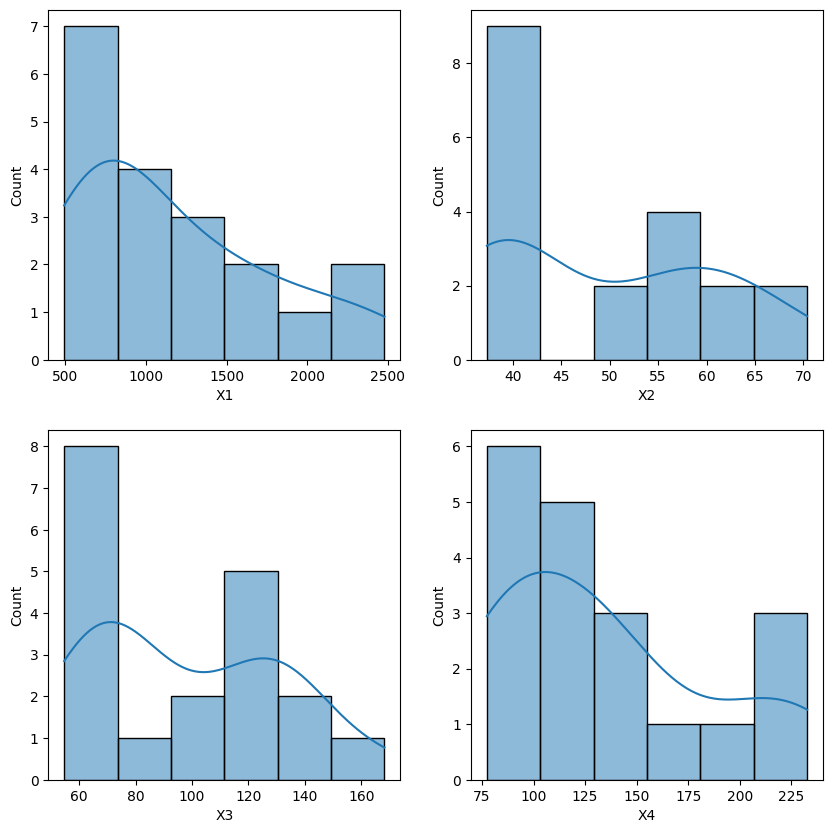

In [13]:
plt.figure(figsize=(10,10))
for i in range(2, 6):
  plt.subplot(2, 2, i-1)
  sns.histplot(data_1[data_1.columns[i]], kde=True)
  plt.xlabel(data_1.columns[i])

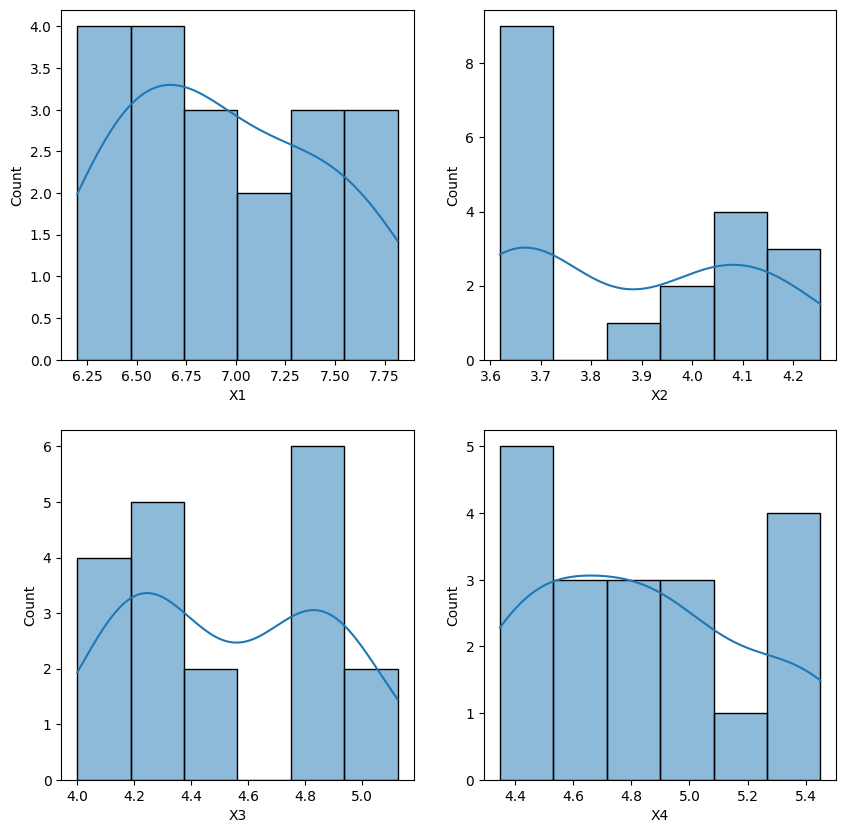

In [14]:
plt.figure(figsize=(10,10))
for i in range(1, 5):
  plt.subplot(2, 2, i)
  sns.histplot(df_log[df_log.columns[i]], kde=True)
  plt.xlabel(df_log.columns[i])

In [15]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


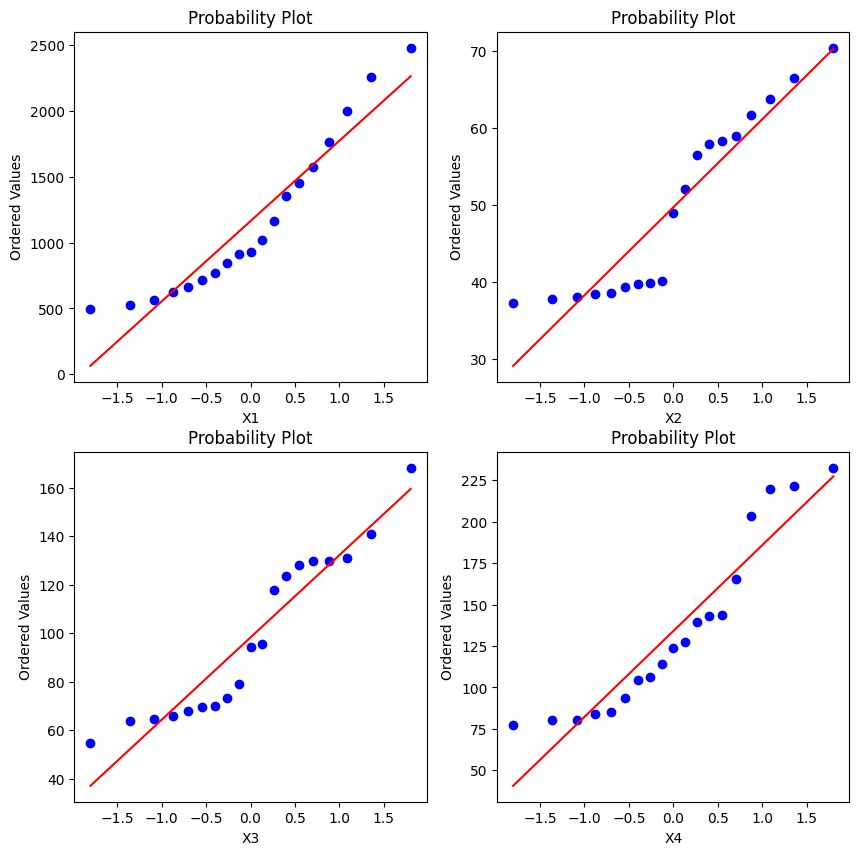

In [16]:
plt.figure(figsize=(10,10))
for i in range(2, 6):
  plt.subplot(2, 2, i-1)
  sc.stats.probplot(data_1[data_1.columns[i]], dist='norm', plot=pylab)
  plt.xlabel(data_1.columns[i])
plt.show()

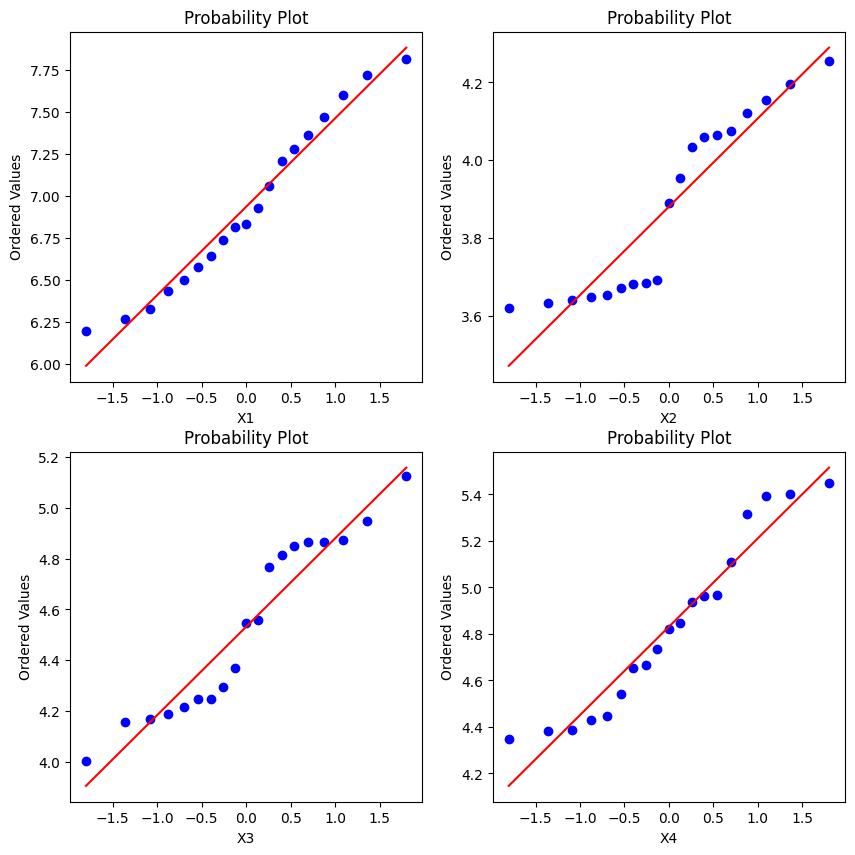

In [17]:
plt.figure(figsize=(10,10))
for i in range(1, 5):
  plt.subplot(2, 2, i)
  sc.stats.probplot(df_log[df_log.columns[i]], dist='norm', plot=pylab)
  plt.xlabel(df_log.columns[i])
plt.show()

In [18]:
cols = df_log.columns
for i in range(1,5):
   print(cols[i],'       ', stats.shapiro(df_log.iloc[:, i]))

X1         ShapiroResult(statistic=0.9548606872558594, pvalue=0.4759369194507599)
X2         ShapiroResult(statistic=0.8481188416481018, pvalue=0.006252926308661699)
X3         ShapiroResult(statistic=0.9075713157653809, pvalue=0.06681734323501587)
X4         ShapiroResult(statistic=0.9213939905166626, pvalue=0.12008900940418243)


Для логарифмированных данных - X1 и X4 соответствуют нормальному распределению по тесту Шапиро-Уилка

## с) Для данных из пункта b, которые не прошли проверку, применить преобразования Бокса-Кокса.

In [19]:
best_lambda = np.zeros(4)
new_data_1 = data_1.drop('t',axis=1)
new_data_1 = new_data_1.drop('Y',axis=1)

In [20]:
i =0
for column in  new_data_1.columns:
  new_data_1[column], best_lambda[i] = boxcox(data_1[column])
  i+=1

In [21]:
cols = new_data_1.columns
for i in range(4):
   print(cols[i],'       ', stats.shapiro(new_data_1.iloc[:, i]))

X1         ShapiroResult(statistic=0.9598411917686462, pvalue=0.569256603717804)
X2         ShapiroResult(statistic=0.8407939672470093, pvalue=0.004768925718963146)
X3         ShapiroResult(statistic=0.9084967374801636, pvalue=0.06947548687458038)
X4         ShapiroResult(statistic=0.9304439425468445, pvalue=0.17648252844810486)


In [22]:
best_lambda

array([-0.30309361, -0.79097492, -0.25132616, -0.58520377])

In [23]:
new_data_1

,X1,X2,X3,X4
0,2.795503,1.192043,2.523566,1.574717
1,2.806068,1.193245,2.578226,1.577477
2,2.814698,1.194966,2.610052,1.577668
3,2.830396,1.192800,2.590128,1.580898
4,2.839513,1.193684,2.582613,1.582304
5,2.849752,1.196062,2.611036,1.588905
6,2.858904,1.193974,2.626317,1.597316
7,2.871180,1.195655,2.600014,1.596509
8,2.881167,1.195519,2.652413,1.601905
9,2.883841,1.208818,2.713429,1.607086


После применения преобразования Бокса-Кокса переменные Х1, Х3, Х4 стали распределены нормально по тесту Шапиро-Уилка.
Переменная Х2 не стала нормальной после преобразования ШБокса-Кокса.

Посмотрим на графики преобразованных данных

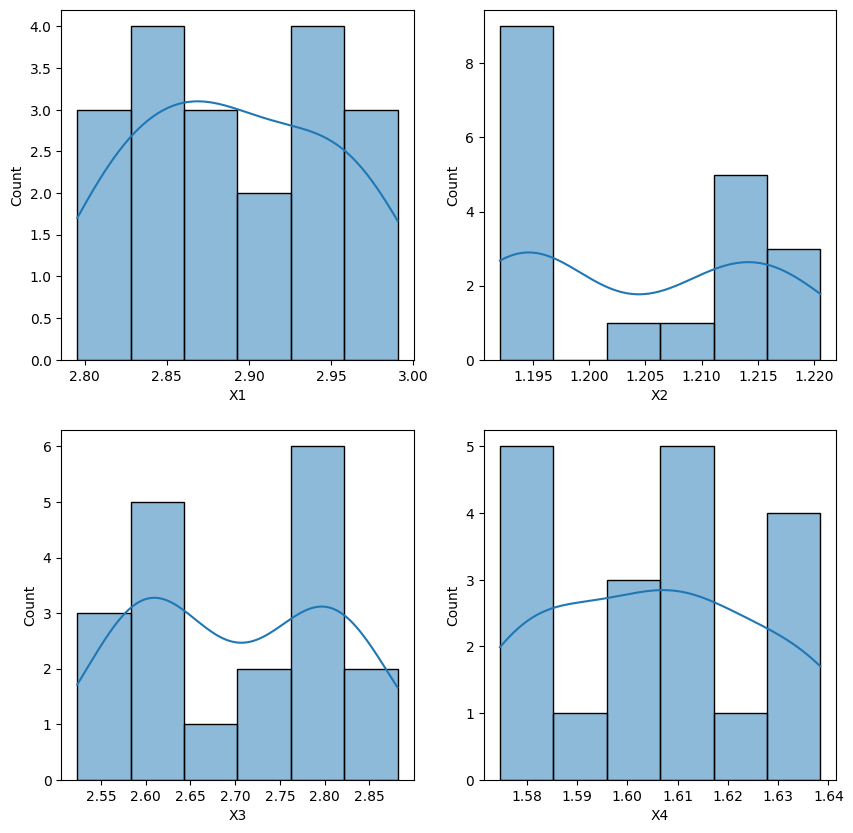

In [24]:
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(2, 2, i+1)
  sns.histplot(new_data_1[new_data_1.columns[i]], kde=True)
  plt.xlabel(new_data_1.columns[i])

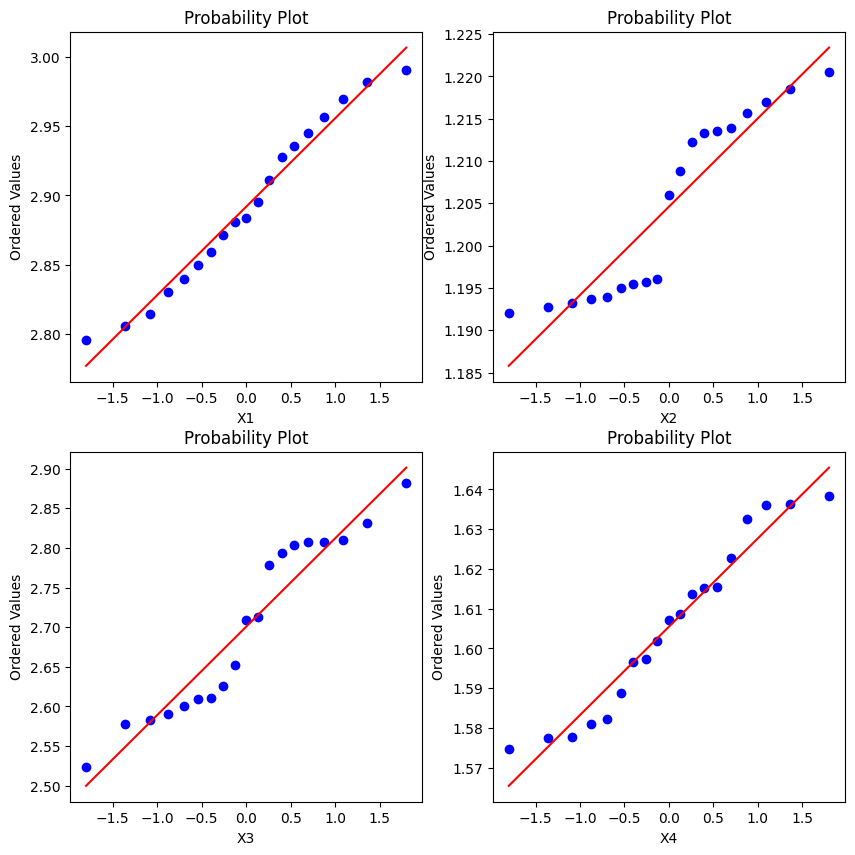

In [25]:
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(2, 2, i+1)
  sc.stats.probplot(new_data_1[new_data_1.columns[i]], dist='norm', plot=pylab)
  plt.xlabel(new_data_1.columns[i])
plt.show()

## d) Применить критерий Манна-Уитни для оценки различий данных X3 и X4. Дать интерпретацию.

Проведем тест Манна-Уитни.

$H_0$: Между X3 и Х4 нет  статистически значимых различий

$H_1$: Различия между X3 и Х4 существенны

In [26]:
stats.mannwhitneyu(data_1['X3'], data_1['X4'], alternative='two-sided')

MannwhitneyuResult(statistic=102.0, pvalue=0.02277486537233766)

Так как p-value меньше критического значения в 0,05, нулевая гипотеза отвергается, и принимается гипотеза $H_1$ о существенном различии групп

## e) Применить критерий Флигнера-Клипера для X2 и X3. Применить критерий Стьюдента для этих данных с учетом полученных результатов. Привести интерпретацию.

Проведем тест Флингера-Клипера.

$H_0$: гомогенность диспресии $\sigma_2 = \sigma_3$

$H_1$: гомогенность отсутствует $\sigma_2 \neq \sigma_3$

In [27]:
stats.fligner( data_1['X2'], data_1['X3'])

FlignerResult(statistic=16.797459660607196, pvalue=4.158894013328987e-05)

Так как p-value < 0.05 уровня значимости, имеем основания отвергнуть нулевую гипотезу о равенстве диспресий в выборках Х2 и Х3.

Принимается гипотеза об отсутствии гомогенности

Применим критерий Стьюдента для проверки гипотезы о равенстве средних в переменных Х2 и Х3

$H_0$: средние выборок равны $\mu_2 = \mu_3$

$H_1$: средние выборок не равны $\mu_2 \neq \mu_3$

In [28]:
stats.ttest_rel( data_1['X2'], data_1['X3'])

TtestResult(statistic=-9.433823005758445, pvalue=2.1731208937339906e-08, df=18)

Так как p-value < 0.05 уровня значимости, имеем основания отвергнуть нулевую гипотезу о равенстве средних в выборках и принимаем гипотезу об неравенстве.

# Задание 2


По данным из файла показателей деятельности 50 фирм, оказывающих фото- и видео-услуги в городе N, за 2019 г. рассмотреть возможности оценивания нелинейной, в частности полиномиальной, регрессии прибыльности вложений в оборудование (profitability, %) на показатели среднего числа сотрудников на один проект (staff), среднемесячного числа проектов (projects), доли расходов на рекламу и продвижение своего бренда (adverts, %).




## а) Найти степень полинома, при которой коэффициент детерминации оказывается близким к 1.

In [29]:
data_2 = pd.read_excel("num2.xlsx")

In [30]:
data_2

,staff,adverts,projects,profitability
0,8.768088,24.515827,8.499298,142.095390
1,9.129025,27.002612,7.414980,123.296482
2,8.269365,25.496132,6.524985,110.811052
3,9.838063,18.273113,5.211359,90.649576
4,10.382268,11.992892,7.973063,84.343632
5,12.434296,26.899897,6.773995,89.447333
6,10.251780,24.745389,4.198278,89.230581
7,10.024197,22.234361,5.617333,96.510123
8,10.828769,18.385866,4.034545,85.343851
9,10.831586,28.322103,5.250528,89.210206


In [31]:
y_2=data_2.profitability

In [32]:
X_2 = data_2.drop('profitability',axis=1)

In [33]:
reg=LinearRegression()
reg.fit(X_2,y_2)

LinearRegression()

In [34]:
reg.score(X_2,y_2)

0.7565007565055556

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.25, random_state=0)
reg_2=LinearRegression()
reg_2.fit(X_train,y_train)
reg_2.score(X_test,y_test)

0.6627814374785264

Коэффициент детерминации равен 0,757, говорит о том что чуть более 75% дисперсий данных зависимой переменной описывается Х. Неплохой результат.

Предположим, что данные зависят нелинейно - попробуем полиномиальную модель - возведем в квадрат переменные и добавим все попарные произведения

In [35]:
polynom=PolynomialFeatures(degree=2)
X_poly2 = polynom.fit_transform(X_2)

In [36]:
X_poly2.shape

(50, 10)

In [37]:
X_2.shape

(50, 3)

In [39]:
reg2=LinearRegression()
reg2.fit(X_poly2,y_2)

LinearRegression()

In [40]:
reg2.score(X_poly2,y_2)

0.9125016061924566

Коэффициент детерминации стал равен 0,91, что говорит о том, что переменные X_poly2 описывают дисперсии переменной у на 91%

Что будет, если будут только попарные произведения?


In [41]:
polynom=PolynomialFeatures(degree=2, interaction_only=True)
X_poly3 = polynom.fit_transform(X_2)

In [42]:
reg3=LinearRegression()
reg3.fit(X_poly3,y_2)

LinearRegression()

In [43]:
reg3.score(X_poly3,y_2)

0.7652385558622601

Качество модели понизилось, что говорит о значимости квадратов переменных

In [44]:
polynom=PolynomialFeatures(degree=3)
X_poly4 = polynom.fit_transform(X_2)

In [45]:
reg4=LinearRegression()
reg4.fit(X_poly4,y_2)

LinearRegression()

In [46]:
X_poly4.shape

(50, 20)

In [47]:
reg4.score(X_poly4,y_2)

0.9606508601810395

Качество модели повысилось до 96%

In [48]:
polynom=PolynomialFeatures(degree=6)
X_poly5 = polynom.fit_transform(X_2)

In [49]:
reg5=LinearRegression()
reg5.fit(X_poly5,y_2)

LinearRegression()

In [50]:
reg5.score(X_poly5,y_2)

1.0

Итак при полиноме 6 степени модель полностью описывает данные

In [51]:
r_adj = np.zeros(30)
for i in range(30):
    polynom=PolynomialFeatures(degree=i+1)
    X_poly = polynom.fit_transform(X_2)
    reg=LinearRegression()
    reg.fit(X_poly,y_2)
    r_adj[i] = reg.score(X_poly,y_2)
    

In [52]:
r_adj

array([0.75650076, 0.91250161, 0.96065086, 0.96564433, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999856, 0.99999888, 0.99999912, 0.9999993 ,
       0.9999938 , 0.99998887, 0.99999366, 0.99990648, 0.99995477])

В общем уже на полиноме 5 степени $R^2$ становится равным единице и на 22 незначительно начинает понижаться


## b) Показать, что результат достигнут за счет переобучения модели.

Такое можно проверить с помощью кросс-валидации:

Предыдущие вычисления качества модели были сделаны при обучении данных на всей выборке 

Теперь 33% данных будут тестовыми 

Проверять будем на полиноме 5 степени, так как при нем впервые достигается $R^2$ равный единице

In [53]:
polynom=PolynomialFeatures(degree=5)
X_poly = polynom.fit_transform(X_2)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_2, test_size=0.25, random_state=0)

In [55]:
reg_poly=LinearRegression()
reg_poly.fit(X_train,y_train)

LinearRegression()

In [56]:
reg_poly.score(X_train,y_train)

1.0

In [57]:
reg_poly.score(X_test,y_test)

-43106.41869105432

## с) Выбрать оптимальную степень полинома, в том числе с содержательной точки зрения, предполагая, что фирмы можно считать однородными по прочим возможным показателям их деятельности.

In [58]:
res=np.zeros(3)

In [59]:
polynom=PolynomialFeatures(degree=4)
X_poly = polynom.fit_transform(X_2)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_2, test_size=0.25, random_state=0)
reg_poly=LinearRegression()
reg_poly.fit(X_train,y_train)

LinearRegression()

In [60]:
reg_poly.score(X_train,y_train)

0.845518363012804

In [61]:
reg_poly.score(X_test,y_test)

-162.72586209154625

In [62]:
y_pred = reg_poly.predict(X_test)
res[0]=np.sum((y_test - y_pred)**2)

In [63]:
polynom=PolynomialFeatures(degree=3)
X_poly = polynom.fit_transform(X_2)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_2, test_size=0.25, random_state=0)
reg_poly=LinearRegression()
reg_poly.fit(X_train,y_train)
reg_poly.score(X_train,y_train)

0.969758225661135

In [64]:
reg_poly.score(X_test,y_test)

0.2317917096180936

In [65]:
y_pred = reg_poly.predict(X_test)
res[1]=np.sum((y_test - y_pred)**2)

In [66]:
polynom=PolynomialFeatures(degree=2)
X_poly = polynom.fit_transform(X_2)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_2, test_size=0.25, random_state=0)
reg_poly=LinearRegression()
reg_poly.fit(X_train,y_train)
reg_poly.score(X_train,y_train)

0.9135799866595289

In [67]:
reg_poly.score(X_test,y_test)

0.8612810916833512

In [68]:
y_pred = reg_poly.predict(X_test)
res[2]=np.sum((y_test - y_pred)**2)

In [69]:
res

array([4.97458485e+05, 2.33409510e+03, 4.21478299e+02])

# Задание 3

Применить метод главных компонент для понижения размерности данных  о результативности деятельности российских вузов.

а) Определить минимальное количество компонент, которые необходимо использовать для сохранения 75% первоначальной информации.

In [75]:
data_3 = pd.read_excel("num3.xlsx")

In [76]:
data_3

,id,Ведущий вуз,"Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ","Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Web of Science в расчете на 100 НПР","Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Scopus в расчете на 100 НПР","Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Web of Science, в расчете на 100 НПР","Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Scopus, в расчете на 100 НПР","Доходы от НИОКР (за исключением средств бюджетов бюджетной системы Российской Федерации, государственных фондов поддержки науки) в расчете на одного НПР","Удельный вес численности НПР без ученой степени – до 30 лет, кандидатов наук – до 35 лет, докторов наук – до 40 лет, в общей численности НПР",Количество полученных грантов за отчетный год в расчете на 100 НПР,Доходы образовательной организации из средств от приносящей доход деятельности в расчете на одного НПР,"Число статей, подготовленных совместно с зарубежными организациями",Доля доходов вуза из внебюджетных источников,Доля доходов вуза от научных исследований и разработок в общих доходах вуза,Доля внебюджетных средств в доходах от научных исследований и разработок
0,96,0,60.96,2.68,186.81,0.67,4.02,45.11,5.93,0.67,705.98,0,42.02,2.68,100.00
1,97,0,55.02,7.42,11.34,2.18,4.36,89.58,3.29,1.31,568.75,2,29.96,4.72,100.00
2,99,0,69.08,51.50,56.98,23.53,28.41,129.33,16.78,9.92,806.07,18,29.21,11.24,41.70
3,101,0,53.54,64.43,59.06,1.34,2.68,86.71,9.09,2.68,675.82,0,21.33,8.51,32.17
4,103,0,61.61,56.86,96.73,19.57,20.31,88.33,13.87,1.85,705.08,6,18.79,3.14,74.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1804,0,78.22,128.12,143.61,1.89,6.24,53.79,9.40,7.94,736.24,4,44.48,3.87,83.96
436,1806,0,73.79,1.91,3.83,6.70,4.78,13.76,6.20,0.96,1182.20,0,33.59,0.39,100.00
437,1807,0,72.16,26.44,19.04,4.23,10.58,0.00,0.00,4.23,279.09,2,11.15,6.06,0.00
438,1810,0,88.00,16.65,19.49,6.38,9.21,296.02,17.94,0.00,1988.55,13,44.89,37.32,17.90


In [77]:
data_3.describe()

,id,Ведущий вуз,"Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ","Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Web of Science в расчете на 100 НПР","Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Scopus в расчете на 100 НПР","Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Web of Science, в расчете на 100 НПР","Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Scopus, в расчете на 100 НПР","Доходы от НИОКР (за исключением средств бюджетов бюджетной системы Российской Федерации, государственных фондов поддержки науки) в расчете на одного НПР","Удельный вес численности НПР без ученой степени – до 30 лет, кандидатов наук – до 35 лет, докторов наук – до 40 лет, в общей численности НПР",Количество полученных грантов за отчетный год в расчете на 100 НПР,Доходы образовательной организации из средств от приносящей доход деятельности в расчете на одного НПР,"Число статей, подготовленных совместно с зарубежными организациями",Доля доходов вуза из внебюджетных источников,Доля доходов вуза от научных исследований и разработок в общих доходах вуза,Доля внебюджетных средств в доходах от научных исследований и разработок
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,882.752273,0.095455,68.378932,177.743205,238.637091,19.351727,26.943773,187.548159,13.066136,4.760273,1218.938477,61.122727,35.729114,8.235318,62.521591
std,759.054711,0.294176,12.064899,623.124934,865.264831,31.040787,39.419942,329.457802,6.786782,6.874771,921.505332,224.585446,14.845077,8.196771,31.806726
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.750000,0.000000,61.420000,14.690000,25.785000,4.875000,7.827500,46.505000,8.682500,0.650000,632.545000,1.000000,25.110000,3.360000,40.205000
50%,325.500000,0.000000,68.750000,43.285000,70.655000,10.560000,16.345000,91.610000,12.215000,2.715000,974.815000,8.000000,34.530000,5.320000,71.920000
75%,1676.250000,0.000000,75.315000,112.897500,167.460000,21.280000,30.552500,186.202500,16.922500,6.172500,1462.902500,29.000000,45.270000,10.037500,89.795000
max,1812.000000,1.000000,98.000000,7351.080000,11675.680000,279.070000,348.530000,3185.780000,48.070000,54.770000,6145.710000,3096.000000,82.720000,55.680000,100.000000


In [78]:
df = data_3.drop(data_3.columns[[0]],axis=1)

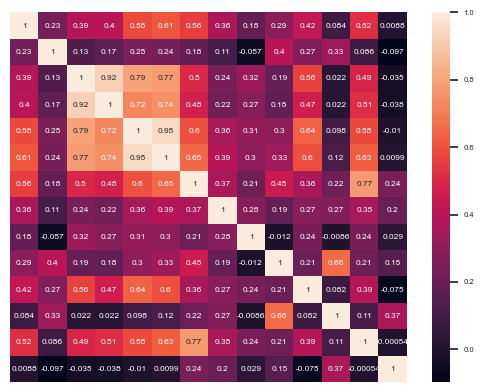

In [79]:
sns.set(font_scale= 0.5)
sns.heatmap(df.corr(), annot = True, yticklabels=False, xticklabels=False)
plt.show()

In [80]:
df.corr()

,Ведущий вуз,"Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ","Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Web of Science в расчете на 100 НПР","Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Scopus в расчете на 100 НПР","Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Web of Science, в расчете на 100 НПР","Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Scopus, в расчете на 100 НПР","Доходы от НИОКР (за исключением средств бюджетов бюджетной системы Российской Федерации, государственных фондов поддержки науки) в расчете на одного НПР","Удельный вес численности НПР без ученой степени – до 30 лет, кандидатов наук – до 35 лет, докторов наук – до 40 лет, в общей численности НПР",Количество полученных грантов за отчетный год в расчете на 100 НПР,Доходы образовательной организации из средств от приносящей доход деятельности в расчете на одного НПР,"Число статей, подготовленных совместно с зарубежными организациями",Доля доходов вуза из внебюджетных источников,Доля доходов вуза от научных исследований и разработок в общих доходах вуза,Доля внебюджетных средств в доходах от научных исследований и разработок
Ведущий вуз,1.000000,0.226272,0.389168,0.401662,0.581800,0.610159,0.556558,0.362891,0.182499,0.292271,0.421596,0.083967,0.519307,0.008816
"Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ",0.226272,1.000000,0.131253,0.169490,0.249363,0.235812,0.184833,0.105434,-0.057334,0.403135,0.266148,0.332402,0.086445,-0.097172
"Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Web of Science в расчете на 100 НПР",0.389168,0.131253,1.000000,0.920724,0.794320,0.774783,0.498919,0.238021,0.323501,0.191989,0.562923,0.021963,0.491401,-0.035215
"Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Scopus в расчете на 100 НПР",0.401662,0.169490,0.920724,1.000000,0.722199,0.744949,0.475657,0.220248,0.274414,0.180360,0.466678,0.021984,0.514973,-0.038395
"Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Web of Science, в расчете на 100 НПР",0.581800,0.249363,0.794320,0.722199,1.000000,0.950994,0.601162,0.356283,0.313272,0.300583,0.637678,0.098230,0.581709,-0.009982
"Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Scopus, в расчете на 100 НПР",0.610159,0.235812,0.774783,0.744949,0.950994,1.000000,0.650631,0.387362,0.301204,0.333411,0.595778,0.118375,0.627308,0.009888
"Доходы от НИОКР (за исключением средств бюджетов бюджетной системы Российской Федерации, государственных фондов поддержки науки) в расчете на одного НПР",0.556558,0.184833,0.498919,0.475657,0.601162,0.650631,1.000000,0.366183,0.211313,0.447813,0.357177,0.215243,0.768751,0.240292
"Удельный вес численности НПР без ученой степени – до 30 лет, кандидатов наук – до 35 лет, докторов наук – до 40 лет, в общей численности НПР",0.362891,0.105434,0.238021,0.220248,0.356283,0.387362,0.366183,1.000000,0.276306,0.188190,0.273564,0.266431,0.354295,0.201155
Количество полученных грантов за отчетный год в расчете на 100 НПР,0.182499,-0.057334,0.323501,0.274414,0.313272,0.301204,0.211313,0.276306,1.000000,-0.011576,0.240165,-0.008602,0.239368,0.028501
Доходы образовательной организации из средств от приносящей доход деятельности в расчете на одного НПР,0.292271,0.403135,0.

Для того, чтоб найти главные компоненты необходимо как минимум центрировать данные

Поэтому стандартизируем данные - это как центрировать, только еще и разделить на средне квадратичное отклонение



In [81]:
df_std=StandardScaler().fit_transform(df)

In [82]:
df_std

array([[-0.32485018, -0.61561866, -0.28126379, ...,  0.42425158,
        -0.67851619,  1.1796584 ],
       [-0.32485018, -1.10851642, -0.27364831, ..., -0.38906371,
        -0.4293544 ,  1.1796584 ],
       [-0.32485018,  0.05817423, -0.20282756, ..., -0.43964302,
         0.36698623, -0.65537372],
       ...,
       [-0.32485018,  0.31375085, -0.24308999, ..., -1.6575928 ,
        -0.2656893 , -1.96790956],
       [-0.32485018,  1.62814487, -0.25881901, ...,  0.61780174,
         3.55234873, -1.4044949 ],
       [-0.32485018,  0.65396647, -0.28556959, ...,  1.17552293,
        -0.29622383, -1.96790956]])

## Подсчет без sklearn'a

найдем ковариационные матрицы


In [83]:
cov_mat = np.cov(df_std.T)

Далее найдем собственные ветора и значения этой ковариационной матрицы


In [84]:
eig_vals, eig_vect = np.linalg.eig(cov_mat)

In [85]:
eig_vals

array([5.80134388, 1.99048303, 1.31211755, 0.93062446, 0.90029407,
       0.03415046, 0.06734369, 0.12897147, 0.32292444, 0.2853517 ,
       0.6800082 , 0.48717957, 0.56255042, 0.52854772])

In [86]:
eig_vect

array([[ 0.28607737, -0.02481524,  0.00682614,  0.39403135, -0.28151793,
         0.01669658, -0.06390926, -0.04075329,  0.43039161,  0.09587611,
        -0.13003679, -0.58657182,  0.34554262, -0.046426  ],
       [ 0.13099801, -0.28601704, -0.55206542, -0.08923343, -0.25887789,
         0.04680847, -0.05783168,  0.05099161, -0.02361931, -0.0028601 ,
        -0.07921568,  0.18195012,  0.16481148,  0.66785601],
       [ 0.3411948 ,  0.22033491, -0.06754983, -0.25780591,  0.31404117,
         0.39034334, -0.60500433, -0.22100264,  0.10981445,  0.22912169,
        -0.02133291, -0.05408528, -0.16526401,  0.05386199],
       [ 0.32879358,  0.20743165, -0.0836795 , -0.1952913 ,  0.33994   ,
        -0.34887955,  0.49914697,  0.1683043 ,  0.30541929,  0.27846754,
         0.00904559, -0.11125036, -0.24076183,  0.21846266],
       [ 0.37793811,  0.1094939 , -0.07167981, -0.06517335,  0.05997512,
        -0.61202557, -0.31001238, -0.02107039, -0.3068826 , -0.4822384 ,
        -0.11760652, -0.11

создадим пару - собственное значение + собственный вектор
и отсортируем по убывванию собственного значения


In [87]:
eig_pair = [(np.abs(eig_vals[i]),eig_vect[:,i]) for i in range(0,14)]
eig_pair.sort(key=lambda x: x[0],reverse=True)

In [88]:
eig_pair

[(5.801343880839237,
  array([0.28607737, 0.13099801, 0.3411948 , 0.32879358, 0.37793811,
         0.3846081 , 0.32176089, 0.2020661 , 0.1550142 , 0.1826431 ,
         0.28062705, 0.09893056, 0.30772848, 0.02711555])),
 (1.990483033342303,
  array([-0.02481524, -0.28601704,  0.22033491,  0.20743165,  0.1094939 ,
          0.08495492, -0.13651277, -0.16075792,  0.16134255, -0.49870019,
          0.09218763, -0.59425588,  0.03930942, -0.35270505])),
 (1.3121175545452275,
  array([ 0.00682614, -0.55206542, -0.06754983, -0.0836795 , -0.07167981,
         -0.03790917,  0.19320196,  0.35538852,  0.34610297, -0.20997499,
         -0.18632046, -0.01268651,  0.17018051,  0.5345039 ])),
 (0.9306244631551198,
  array([ 0.39403135, -0.08923343, -0.25780591, -0.1952913 , -0.06517335,
         -0.00273489,  0.38366955, -0.0737562 , -0.514355  , -0.02337712,
         -0.18869921, -0.25192991,  0.43578113, -0.14556082])),
 (0.900294071603643,
  array([-0.28151793, -0.25887789,  0.31404117,  0.33994   

In [89]:
sum_eigs=np.sum(eig_vals)
sum_eigs

14.031890660592259

Для каждого собственного значения посчитаем отношение собственных значений \ к сумме всех собственных значений. - получаем долю

In [90]:
var_eig = [(i/sum_eigs)*100 for i in sorted(eig_vals, reverse=True)]

In [91]:
var_eig

[41.343992917019875,
 14.185422916189461,
 9.350967637099915,
 6.632210053978856,
 6.416056776525961,
 4.846162334419645,
 4.009084957375869,
 3.766760561196927,
 3.471945298427759,
 2.301360865728096,
 2.0335940605856417,
 0.9191310688933498,
 0.479933099192395,
 0.24337745336624386]

In [92]:
sum(var_eig)

100.0

In [93]:
np.cumsum(var_eig)

array([ 41.34399292,  55.52941583,  64.88038347,  71.51259352,
        77.9286503 ,  82.77481264,  86.78389759,  90.55065815,
        94.02260345,  96.32396432,  98.35755838,  99.27668945,
        99.75662255, 100.        ])

На этом шаге видим, что минимальное необходимое количество компонент для сохранения 75% изначальных данных = 5

In [94]:
PCA_coef = np.hstack((eig_pair[0][1].reshape(14,1),
                       eig_pair[1][1].reshape(14,1),
                       eig_pair[2][1].reshape(14,1),
                       eig_pair[3][1].reshape(14,1),
                       eig_pair[4][1].reshape(14,1),
                       ))

In [95]:
PCA_coef

array([[ 0.28607737, -0.02481524,  0.00682614,  0.39403135, -0.28151793],
       [ 0.13099801, -0.28601704, -0.55206542, -0.08923343, -0.25887789],
       [ 0.3411948 ,  0.22033491, -0.06754983, -0.25780591,  0.31404117],
       [ 0.32879358,  0.20743165, -0.0836795 , -0.1952913 ,  0.33994   ],
       [ 0.37793811,  0.1094939 , -0.07167981, -0.06517335,  0.05997512],
       [ 0.3846081 ,  0.08495492, -0.03790917, -0.00273489,  0.07193408],
       [ 0.32176089, -0.13651277,  0.19320196,  0.38366955,  0.11159878],
       [ 0.2020661 , -0.16075792,  0.35538852, -0.0737562 , -0.51233973],
       [ 0.1550142 ,  0.16134255,  0.34610297, -0.514355  , -0.40257112],
       [ 0.1826431 , -0.49870019, -0.20997499, -0.02337712,  0.09227097],
       [ 0.28062705,  0.09218763, -0.18632046, -0.18869921, -0.18320373],
       [ 0.09893056, -0.59425588, -0.01268651, -0.25192991,  0.06123391],
       [ 0.30772848,  0.03930942,  0.17018051,  0.43578113, -0.02174976],
       [ 0.02711555, -0.35270505,  0.5

Создадим таблицу в которой будут отображаться зависимости главных компонент из пункта а) от первоначальных данных.

In [96]:
depend = pd.DataFrame(PCA_coef)

In [97]:
depend.rename(columns={0:'PC_1', 1:'PC_2', 2:'PC_3', 3:'PC_4', 4:'PC_5'}, inplace=True)
depend.index = ['x_1', 'x_2', 'x_3', 'x_4','x_5', 'x_6', 'x_7', 'x_8','x_9', 'x_10', 'x_11', 'x_12','x_13', 'x_14']

In [98]:
depend

,PC_1,PC_2,PC_3,PC_4,PC_5
x_1,0.286077,-0.024815,0.006826,0.394031,-0.281518
x_2,0.130998,-0.286017,-0.552065,-0.089233,-0.258878
x_3,0.341195,0.220335,-0.067550,-0.257806,0.314041
x_4,0.328794,0.207432,-0.083680,-0.195291,0.339940
x_5,0.377938,0.109494,-0.071680,-0.065173,0.059975
x_6,0.384608,0.084955,-0.037909,-0.002735,0.071934
x_7,0.321761,-0.136513,0.193202,0.383670,0.111599
x_8,0.202066,-0.160758,0.355389,-0.073756,-0.512340
x_9,0.155014,0.161343,0.346103,-0.514355,-0.402571
x_10,0.182643,-0.498700,-0.209975,-0.023377,0.092271


In [99]:
X_=df_std.dot(PCA_coef)

In [100]:
X_

array([[-1.49829115, -0.31555264,  0.44049626, -0.23987052,  1.2871424 ],
       [-1.65456677,  0.4185336 ,  0.72759311,  0.18651348,  1.45813232],
       [-0.07231803,  0.69117285,  0.2541902 , -0.1306595 , -0.94365142],
       ...,
       [-1.7068463 ,  2.25213157, -1.72138949,  0.61430197, -0.15400768],
       [ 0.9699213 , -1.09259771, -1.02562833,  1.91922703, -1.0698308 ],
       [-1.28287332, -0.66197071, -2.52055565,  0.14605211,  0.27933623]])

In [101]:
X_std = StandardScaler().fit_transform(X_)

Так бы выглядели Х после выделения главных компонент

In [102]:
df_pca = pd.DataFrame(X_std)

In [103]:
df_pca.corr()

,0,1,2,3,4
0,1.000000e+00,-1.782665e-16,-4.440892e-16,3.746687e-16,-9.218636e-16
1,-1.782665e-16,1.000000e+00,6.449386e-16,1.402603e-16,-7.645399e-17
2,-4.440892e-16,6.449386e-16,1.000000e+00,-5.408552e-16,-1.579797e-15
3,3.746687e-16,1.402603e-16,-5.408552e-16,1.000000e+00,-5.517493e-15
4,-9.218636e-16,-7.645399e-17,-1.579797e-15,-5.517493e-15,1.000000e+00


все корреляции равны 0- построили главные компоненты верно


## Теперь все то же самое только с помощью встроенных модулей

In [104]:
from sklearn.decomposition import PCA

In [105]:
pca=PCA(n_components=14)
pca_result=pca.fit_transform(df_std)

In [106]:
pca_result

array([[-1.49829115e+00, -3.15552644e-01,  4.40496262e-01, ...,
         1.64342630e-01,  1.62305155e-01, -4.10688129e-02],
       [-1.65456677e+00,  4.18533598e-01,  7.27593106e-01, ...,
        -1.29954182e-02,  1.89024657e-02,  1.62467510e-03],
       [-7.23180294e-02,  6.91172854e-01,  2.54190197e-01, ...,
        -1.53858814e-01, -6.10068702e-02, -5.04606217e-02],
       ...,
       [-1.70684630e+00,  2.25213157e+00, -1.72138949e+00, ...,
         1.17928713e-01,  4.16926365e-02,  1.15055572e-01],
       [ 9.69921300e-01, -1.09259771e+00, -1.02562833e+00, ...,
        -1.33841890e+00, -7.36880445e-01,  1.37991990e-01],
       [-1.28287332e+00, -6.61970714e-01, -2.52055565e+00, ...,
         3.19051846e-01, -6.08883375e-03,  4.92186600e-03]])

In [107]:
pca.explained_variance_ratio_

array([0.41343993, 0.14185423, 0.09350968, 0.0663221 , 0.06416057,
       0.04846162, 0.04009085, 0.03766761, 0.03471945, 0.02301361,
       0.02033594, 0.00919131, 0.00479933, 0.00243377])

In [108]:
np.cumsum(pca.explained_variance_ratio_)

array([0.41343993, 0.55529416, 0.64880383, 0.71512594, 0.7792865 ,
       0.82774813, 0.86783898, 0.90550658, 0.94022603, 0.96323964,
       0.98357558, 0.99276689, 0.99756623, 1.        ])

Итак, минимальное количество компонент, которые необходимо использовать для сохранения 75% первоначальной информации - это первые 5 главных компонент

Получили вывод, аналогичный тому, что был с работой с данными вручную до совершения стандартизации этих данных.

In [109]:
pca=PCA(n_components=5)
pca_result=pca.fit_transform(df_std)
pca_result

array([[-1.49829115, -0.31555264,  0.44049626,  0.23987052,  1.2871424 ],
       [-1.65456677,  0.4185336 ,  0.72759311, -0.18651348,  1.45813232],
       [-0.07231803,  0.69117285,  0.2541902 ,  0.1306595 , -0.94365142],
       ...,
       [-1.7068463 ,  2.25213157, -1.72138949, -0.61430197, -0.15400768],
       [ 0.9699213 , -1.09259771, -1.02562833, -1.91922703, -1.0698308 ],
       [-1.28287332, -0.66197071, -2.52055565, -0.14605211,  0.27933623]])

In [110]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

c:\users\a-bel\pycharmprojects\4\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5
variable,,,,,
Ведущий вуз,0.286077,-0.024815,0.006826,-0.394031,-0.281518
"Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ",0.130998,-0.286017,-0.552065,0.089233,-0.258878
"Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Web of Science в расчете на 100 НПР",0.341195,0.220335,-0.067550,0.257806,0.314041
"Количество цитирований публикаций, изданных за последние 5 лет, индексируемых в информационно-аналитической системе научного цитирования Scopus в расчете на 100 НПР",0.328794,0.207432,-0.083680,0.195291,0.339940
"Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Web of Science, в расчете на 100 НПР",0.377938,0.109494,-0.071680,0.065173,0.059975
"Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Scopus, в расчете на 100 НПР",0.384608,0.084955,-0.037909,0.002735,0.071934
"Доходы от НИОКР (за исключением средств бюджетов бюджетной системы Российской Федерации, государственных фондов поддержки науки) в расчете на одного НПР",0.321761,-0.136513,0.193202,-0.383670,0.111599
"Удельный вес численности НПР без ученой степени – до 30 лет, кандидатов наук – до 35 лет, докторов наук – до 40 лет, в общей численности НПР",0.202066,-0.160758,0.355389,0.073756,-0.512340
Количество полученных грантов за отчетный год в расчете на 100 НПР,0.155014,0.161343,0.346103,0.514355,-0.402571


Данные зависимостей, полученные двумя способами, совпадают.

# Задание 4


По данным из файла обучить модель логистической регрессии с целью прогнозирования увольнения сотрудника.




## а) Отобрать переменные, которые будут включаться в модель. Обосновать сделанный выбор. Обучить модель логистической регрессии. Дать интерпретацию полученных результатов.

In [111]:
data_4 = pd.read_excel("num4.xls")

In [112]:
data_4

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
0,0,50,4,27,8,1.3,1,0,2,3,2,0,0,10.6,1,176,226
1,0,30,3,10,0,0.0,6,1,2,3,0,0,0,11.5,0,186,226
2,0,43,3,22,7,1.9,6,1,1,5,0,3,0,12.8,1,166,238
3,0,58,3,31,7,2.0,4,0,3,3,1,1,0,15.2,1,180,216
4,1,40,3,23,7,0.0,6,1,3,2,0,0,0,16.1,1,180,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0,32,1,8,3,1.3,4,0,3,6,1,1,1,10.1,1,169,227
980,0,52,3,34,6,1.3,5,0,2,2,2,2,0,10.4,0,184,299
981,0,57,3,35,9,2.0,1,0,1,6,3,4,0,9.8,0,167,299
982,0,32,2,10,7,0.0,3,0,4,6,0,3,1,12.6,1,182,295


target – сотрудник уволится в следующем году (0-нет, 1-да)

age-возраст

educ- образование (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)

work_exp – стаж работы (лет)

interest – оценка сотрудником интереса к работе (от 0 до 10)

coffee- среднее количество чашек кофе, выпиваемых сотрудником за рабочий день


boss_educ -образование руководителя (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)

passport- наличие загранпаспорта у сотрудника (1-есть, 0 -нет)

green -степень озеленения офиса (от 1 до 5)

floor – этаж работы

children – количество детей у сотрудника

climate- удовлетворенность рабочей атмосферой (от 0 до 4)

offhour – наличие переработок (1-да, 0 -нет)

dist – расстояние до работы

salary – удовлетворенность заработной платой (1-да, 0 -нет)

height- рост сотрудника

lunch- средняя цена бизнес-ланча в офисе

In [113]:
data_4.describe()

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.320122,41.108740,2.741870,19.360772,5.137195,0.909654,3.819106,0.377033,2.455285,4.945122,1.271341,1.809959,0.494919,12.754065,0.440041,176.913618,253.551829
std,0.466760,12.394227,1.287089,12.485227,2.973344,0.976238,1.501373,0.484890,1.305763,4.468385,1.231393,1.343937,0.500228,4.696912,0.496644,8.215167,56.037621
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.300000,0.000000,153.000000,92.000000
25%,0.000000,32.000000,2.000000,9.000000,3.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,10.700000,0.000000,171.000000,217.000000
50%,0.000000,40.500000,3.000000,18.000000,5.000000,0.500000,4.000000,0.000000,2.000000,4.000000,1.000000,2.000000,0.000000,12.200000,0.000000,177.000000,252.000000
75%,1.000000,50.000000,4.000000,28.000000,8.000000,1.800000,5.000000,1.000000,3.000000,6.000000,2.000000,3.000000,1.000000,13.600000,1.000000,182.000000,290.000000
max,1.000000,80.000000,6.000000,61.000000,10.000000,3.600000,7.000000,1.000000,5.000000,29.000000,4.000000,4.000000,1.000000,40.600000,1.000000,198.000000,444.000000


In [114]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   target     984 non-null    int64  
 1   age        984 non-null    int64  
 2   educ       984 non-null    int64  
 3   work_exp   984 non-null    int64  
 4   interest   984 non-null    int64  
 5   coffee     984 non-null    float64
 6   boss_educ  984 non-null    int64  
 7   passport   984 non-null    int64  
 8   green      984 non-null    int64  
 9   floor      984 non-null    int64  
 10  children   984 non-null    int64  
 11  climate    984 non-null    int64  
 12  offhour    984 non-null    int64  
 13  dist       984 non-null    float64
 14  salary     984 non-null    int64  
 15  heigh      984 non-null    int64  
 16  lunch      984 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 130.8 KB


Для выбора подходящих данных для модели построим матрицу корреляций  и выберем те переменные, которые имеют сильную корреляцию с результирующей target

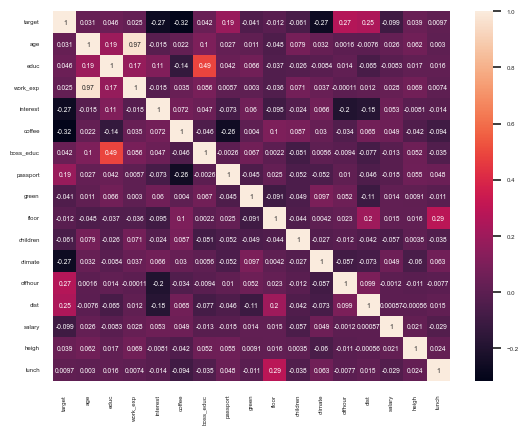

In [115]:
sns.set(font_scale= 0.4)
sns.heatmap(data_4.corr(), annot = True)
plt.show()

In [116]:
data_4.duplicated().sum()

0

###  Обучение логистической регрессии с нормировкой MinMax

Что будет если попробовать обучить модель по всем существующим данным

In [117]:
y=data_4.target
X=data_4.drop(columns=['target'])

In [118]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X)
X_minmax=scaler_minmax.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.33, random_state=42)

clf_minmax=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_minmax = clf_minmax.predict(X_test)

cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix : \n", cm_minmax)

print ("Accuracy : ", accuracy_score(y_test, y_pred_minmax))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

Confusion Matrix : 
 [[182  29]
 [ 60  54]]
Accuracy :  0.7261538461538461
Roc-auc score: 
 0.6681217261162384


In [119]:
pd.DataFrame(data=dict(features=X.columns, coefficients=clf_minmax.coef_[0])).sort_values('coefficients', \
                                                                                        ascending=False)

,features,coefficients
12,dist,1.758746
11,offhour,0.525394
6,passport,0.364096
5,boss_educ,0.170270
2,work_exp,0.156533
0,age,0.146026
1,educ,0.056602
7,green,0.033212
14,heigh,-0.073093
13,salary,-0.164500


In [120]:
clf_minmax.coef_[0]

array([ 0.146026  ,  0.05660174,  0.15653346, -0.77432075, -1.53294324,
        0.17026955,  0.36409646,  0.03321166, -0.44706505, -0.34115106,
       -0.79700611,  0.52539386,  1.75874632, -0.16450004, -0.07309277,
       -0.33966688])

In [121]:
d_n_1mm  = X.drop(columns=['educ','green','heigh'])

In [122]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(d_n_1mm)
X_n1=scaler_minmax.transform(d_n_1mm)


X_train, X_test, y_train, y_test = train_test_split(X_n1, y, test_size=0.33, random_state=42)

clf_minmax=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_minmax = clf_minmax.predict(X_test)

cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix : \n", cm_minmax)

print ("Accuracy : ", accuracy_score(y_test, y_pred_minmax))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

Confusion Matrix : 
 [[184  27]
 [ 59  55]]
Accuracy :  0.7353846153846154
Roc-auc score: 
 0.6772470275214102


после удаления первых трех переменных - 'educ','green','heigh' выросло значение Accuracy и Roc-auc score, что говорит об улучшении качества модели - продолжим удалять переменные

In [123]:
pd.DataFrame(data=dict(features=d_n_1mm.columns, coefficients=clf_minmax.coef_[0])).sort_values('coefficients', \
                                                                                        ascending=False)

,features,coefficients
10,dist,1.749736
9,offhour,0.525786
5,passport,0.362081
4,boss_educ,0.189690
0,age,0.156352
1,work_exp,0.155463
11,salary,-0.166117
12,lunch,-0.337213
7,children,-0.342640
6,floor,-0.453660


In [124]:
d_n_2mm  = d_n_1mm.drop(columns=['age','work_exp'])

In [125]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(d_n_2mm)
X_n2=scaler_minmax.transform(d_n_2mm)


X_train, X_test, y_train, y_test = train_test_split(X_n2, y, test_size=0.33, random_state=42)

clf_minmax=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_minmax = clf_minmax.predict(X_test)

cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix : \n", cm_minmax)

print ("Accuracy : ", accuracy_score(y_test, y_pred_minmax))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

Confusion Matrix : 
 [[184  27]
 [ 62  52]]
Accuracy :  0.7261538461538461
Roc-auc score: 
 0.6640891327845682


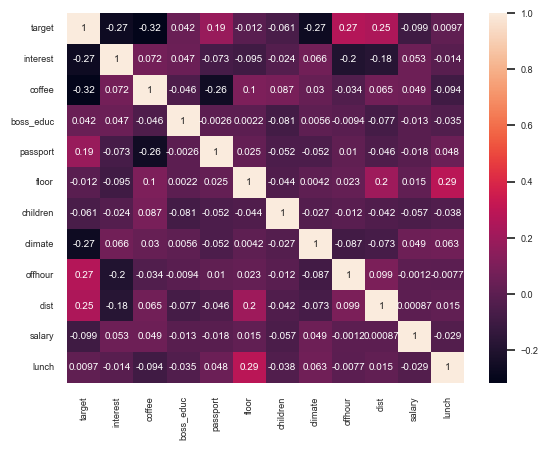

In [126]:
sns.set(font_scale= 0.6)
sns.heatmap(data_4.drop(columns=['age','work_exp','educ','green','heigh']).corr(), annot = True)
plt.show()

 по матрице парных корреляций также видно, что с результирующей переменной плохо коррелируют 'lunch','boss_educ', 'floor','children', 'salary' - их коэф-ты корреляции с target меньше 0,1 (у salary корреляция буквально равна 0,1 при округлении, так что оставим ее)

In [127]:
d_n_3mm  = d_n_2mm.drop(columns=['lunch','boss_educ', 'floor','children'])

In [128]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(d_n_3mm)
X_n3=scaler_minmax.transform(d_n_3mm)


X_train, X_test, y_train, y_test = train_test_split(X_n3, y, test_size=0.33, random_state=42)

clf_minmax=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_minmax = clf_minmax.predict(X_test)

cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix : \n", cm_minmax)

print ("Accuracy : ", accuracy_score(y_test, y_pred_minmax))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

Confusion Matrix : 
 [[188  23]
 [ 63  51]]
Accuracy :  0.7353846153846154
Roc-auc score: 
 0.6691818408580693


In [129]:
d_n_3mm

,interest,coffee,passport,climate,offhour,dist,salary
0,8,1.3,0,0,0,10.6,1
1,0,0.0,1,0,0,11.5,0
2,7,1.9,1,3,0,12.8,1
3,7,2.0,0,1,0,15.2,1
4,7,0.0,1,0,0,16.1,1
...,...,...,...,...,...,...,...
979,3,1.3,0,1,1,10.1,1
980,6,1.3,0,2,0,10.4,0
981,9,2.0,0,4,0,9.8,0
982,7,0.0,0,3,1,12.6,1


Осталось 7 переменных - interest	coffee	passport	climate	offhour	dist salary

Оставим эти столбцы для дальнейшего построения логистической регрессионной модели. 



Confusion Matrix : {{182,  29}{ 60,  54}}

]
Accuracy :  0.7261538461538
461
Roc-auc sco
r: 
 0.66812172611

Такие показатели были для первоначальной модели

Confusion Matrix :{{188  23}{63  51}}

]
Accuracy :  0.7353846153846
154
Roc-auc sco
re: 
 0.66918184085

 Такие показатели после удаления 9 показателей. Значение Accuracy выросло, Roc-auc score так же стало больше, что говорит о том, что модель действительно стала предсказывать лучше8069362384

### Обучение логистической регрессии с нормировкой StandardScaler

То же самое, но с другой нормировкой 

In [130]:
y=data_4.target
X=data_4.drop(columns=['target'])

In [131]:
scaler_standard = StandardScaler()
scaler_standard.fit(X)
X_standard=scaler_standard.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.33, random_state=42)

clf_standard=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_standard = clf_standard.predict(X_test)

cm_standard = confusion_matrix(y_test, y_pred_standard)
print ("Confusion Matrix : \n", cm_standard)

print ("Accuracy : ", accuracy_score(y_test, y_pred_standard))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_standard))

Confusion Matrix : 
 [[180  31]
 [ 57  57]]
Accuracy :  0.7292307692307692
Roc-auc score: 
 0.6765402843601896


In [132]:
X_standard

array([[ 0.71773592,  0.97799782,  0.61217246, ...,  1.12805909,
        -0.11126767, -0.49191667],
       [-0.8967392 ,  0.20065545, -0.75012911, ..., -0.88647838,
         1.10661203, -0.49191667],
       [ 0.15266962,  0.20065545,  0.21149553, ...,  1.12805909,
        -1.32914736, -0.27766592],
       ...,
       [ 1.28280221,  0.20065545,  1.25325555, ..., -0.88647838,
        -1.20735939,  0.81144204],
       [-0.73529169, -0.57668692, -0.75012911, ...,  1.12805909,
         0.61946015,  0.74002513],
       [-0.49312042,  0.20065545, -0.66999373, ...,  1.12805909,
        -1.93808721, -0.93827239]])

In [133]:
pd.DataFrame(data=dict(features=X.columns, coefficients=clf_standard.coef_[0])).sort_values('coefficients', \
                                                                                        ascending=False)

,features,coefficients
12,dist,0.325889
11,offhour,0.279363
6,passport,0.188621
5,boss_educ,0.051404
2,work_exp,0.045995
0,age,0.024537
7,green,0.021767
1,educ,0.009380
14,heigh,-0.022630
15,lunch,-0.057974


In [134]:
d_n_1sc= X.drop(columns=['boss_educ','work_exp','age','green','educ','heigh','lunch'])

In [160]:
d_n_1sc

,interest,coffee,passport,floor,children,climate,offhour,dist,salary
0,8,1.3,0,3,2,0,0,10.6,1
1,0,0.0,1,3,0,0,0,11.5,0
2,7,1.9,1,5,0,3,0,12.8,1
3,7,2.0,0,3,1,1,0,15.2,1
4,7,0.0,1,2,0,0,0,16.1,1
...,...,...,...,...,...,...,...,...,...
979,3,1.3,0,6,1,1,1,10.1,1
980,6,1.3,0,2,2,2,0,10.4,0
981,9,2.0,0,6,3,4,0,9.8,0
982,7,0.0,0,6,0,3,1,12.6,1


In [161]:
scaler_standard = StandardScaler()
scaler_standard.fit(d_n_1sc)
X_st1=scaler_standard.transform(d_n_1sc)

X_train, X_test, y_train, y_test = train_test_split(X_st1, y, test_size=0.33, random_state=42)

clf_standard=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_standard = clf_standard.predict(X_test)

cm_standard = confusion_matrix(y_test, y_pred_standard)
print ("Confusion Matrix : \n", cm_standard)

print ("Accuracy : ", accuracy_score(y_test, y_pred_standard))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_standard))

Confusion Matrix : 
 [[184  27]
 [ 58  56]]
Accuracy :  0.7384615384615385
Roc-auc score: 
 0.6816329924336909


In [163]:
pd.DataFrame(data=dict(features=d_n_1sc.columns, coefficients=clf_standard.coef_[0])).sort_values('coefficients', \
                                                                                        ascending=False)

,features,coefficients
7,dist,0.321296
6,offhour,0.278032
2,passport,0.189365
8,salary,-0.083857
4,children,-0.105872
3,floor,-0.133584
0,interest,-0.234305
5,climate,-0.284478
1,coffee,-0.449660


если удалять до того же состояния, что и в предыдущем случае:

In [136]:
scaler_standard = StandardScaler()
scaler_standard.fit(d_n_3mm)
X_st2=scaler_standard.transform(d_n_3mm)

X_train, X_test, y_train, y_test = train_test_split(X_st2, y, test_size=0.33, random_state=42)

clf_standard_b=LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial'
).fit(X_train, y_train)

y_pred_standard = clf_standard_b.predict(X_test)

cm_standard_b = confusion_matrix(y_test, y_pred_standard)
print ("Confusion Matrix : \n", cm_standard_b)

print ("Accuracy : ", accuracy_score(y_test, y_pred_standard))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_standard))

Confusion Matrix : 
 [[186  25]
 [ 60  54]]
Accuracy :  0.7384615384615385
Roc-auc score: 
 0.6776003991020204


По Roc-auc score предыдущий результа с применением переменной salary в модели показывает лучшие результаты. 

## b) Привести матрицу ошибок, рассмотреть различные метрики качества модели. 

### Для модели с MinMaxScaler

In [147]:
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(d_n_3mm)
X_n3=scaler_minmax.transform(d_n_3mm)

X_test, y_test = X_n3, y

In [148]:
y_pred_minmax = clf_minmax.predict(X_test)

In [149]:
cm_minmax = confusion_matrix(y_test, y_pred_minmax)
print ("Confusion Matrix: \n", cm_minmax)

print ("Accuracy: ", accuracy_score(y_test, y_pred_minmax))

print ("Precision: ", precision_score(y_test, y_pred_minmax))

print("Recall:" , recall_score(y_test, y_pred_minmax))

print("F1:" , f1_score(y_test, y_pred_minmax))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_minmax))

Confusion Matrix: 
 [[585  84]
 [155 160]]
Accuracy:  0.7571138211382114
Precision:  0.6557377049180327
Recall: 0.5079365079365079
F1: 0.5724508050089445
Roc-auc score: 
 0.691187984909958


### Для модели с StandardScaler
(для той, у которой Roc-auc лучше)

In [150]:
scaler_standard = StandardScaler()
scaler_standard.fit(d_n_1sc)
X_st1=scaler_standard.transform(d_n_1sc)

In [151]:
X_test, y_test = X_st1, y

In [152]:
y_pred_std = clf_standard.predict(X_test)

In [153]:
cm_std = confusion_matrix(y_test, y_pred_std)
print ("Confusion Matrix: \n", cm_std)

print ("Accuracy: ", accuracy_score(y_test, y_pred_std))

print ("Precision: ", precision_score(y_test, y_pred_std))

print("Recall:" , recall_score(y_test, y_pred_std))

print("F1:" , f1_score(y_test, y_pred_std))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_std))

Confusion Matrix: 
 [[582  87]
 [143 172]]
Accuracy:  0.766260162601626
Precision:  0.6640926640926641
Recall: 0.546031746031746
F1: 0.5993031358885018
Roc-auc score: 
 0.7079934514912093


Для той, у которой Roc-Auc score хуже

In [154]:
scaler_standard = StandardScaler()
scaler_standard.fit(d_n_3mm)
X_st2=scaler_standard.transform(d_n_3mm)

X_test, y_test = X_st2, y

y_pred_std = clf_standard_b.predict(X_test)

cm_std = confusion_matrix(y_test, y_pred_std)
print ("Confusion Matrix: \n", cm_std)

print ("Accuracy: ", accuracy_score(y_test, y_pred_std))

print ("Precision: ", precision_score(y_test, y_pred_std))

print("Recall:" , recall_score(y_test, y_pred_std))

print("F_1:" , f1_score(y_test, y_pred_std))

print ('Roc-auc score: \n', roc_auc_score(y_test, y_pred_std))

Confusion Matrix: 
 [[579  90]
 [148 167]]
Accuracy:  0.758130081300813
Precision:  0.6498054474708171
Recall: 0.5301587301587302
F_1: 0.5839160839160839
Roc-auc score: 
 0.6978147910883337


Среди представленных моделей лучшая по показателям - StandardScaler с восмью зависимыми переменными.

## c) Построить ROC-кривую. 

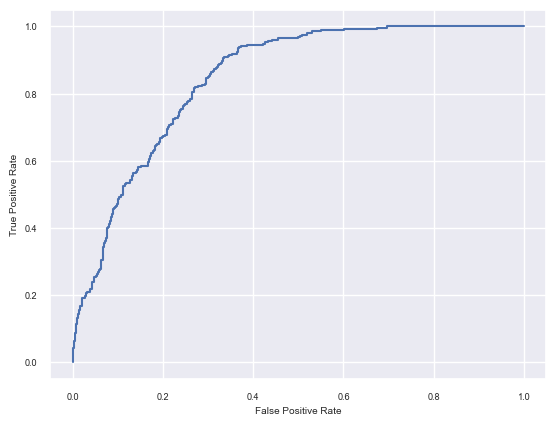

In [155]:
scaler_standard = StandardScaler()
scaler_standard.fit(d_n_1sc)
X_st1=scaler_standard.transform(d_n_1sc)

X_test, y_test = X_st1, y

y_pred_std =clf_standard.predict_proba(X_test)
preds = y_pred_std[:,1]


fpr, tpr, _ = roc_curve(y_test, preds)

#create ROC curve
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 